<a href="https://colab.research.google.com/github/joshIsac/SpeechRecognition-/blob/main/2348523_Fundamentals_of_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Fundamentals of Signal Processing
import numpy as np
import matplotlib.pyplot as plt

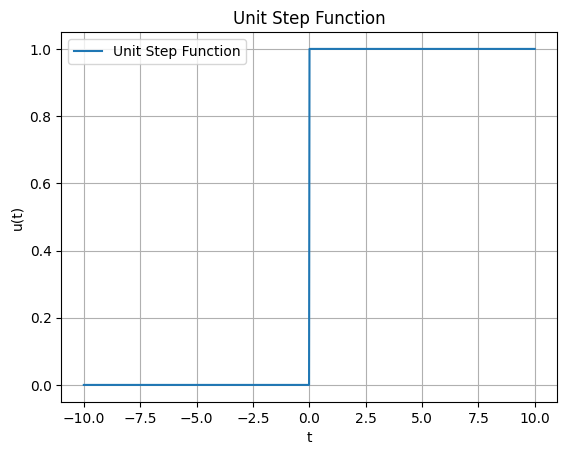

In [ ]:
# @title a)unit step function

#generate unit step function
def unit_step(t):
  if t>0:
    return 1
  else:
    return 0
    # return np.heaviside(t, 1)

t=np.linspace(-10,10,1000)


unit_step_vectorized=np.vectorize(unit_step)
u=unit_step_vectorized(t)


#plot the unit step
plt.plot(t, u, label="Unit Step Function")
plt.title("Unit Step Function")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.grid(True)
plt.legend()
plt.show()



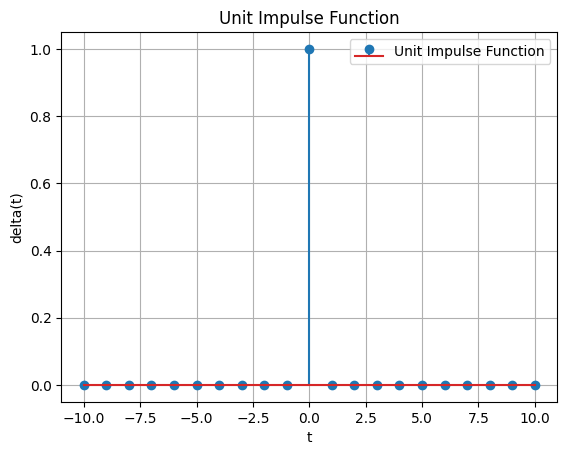

In [ ]:
# @title b)unit impulse function
#generate unit impulse function
def unit_impulse(t):
  return 1 if t==0 else 0

#generate array for disrete time values
t=np.arange(-10,11)

#apply the function
impulse=np.array([unit_impulse(i) for i in t])

plt.stem(t, impulse, label="Unit Impulse Function")
plt.title("Unit Impulse Function")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.grid(True)
plt.legend()
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

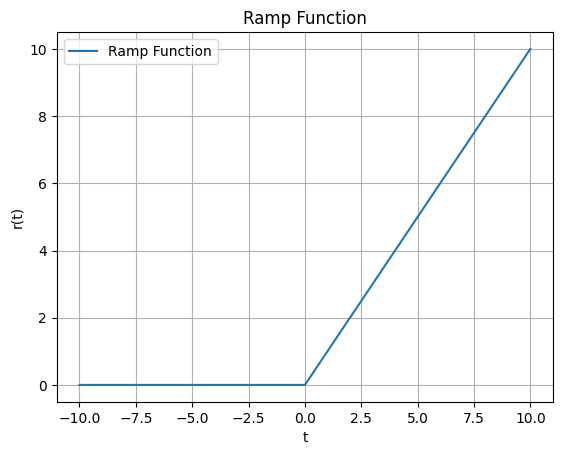

In [ ]:
#Ramp function
def ramp(t):
  if t>0:
    return t
  else:
    return 0

ramp_vectorized=np.vectorize(ramp)

r=ramp_vectorized(t)

plt.plot(t, r, label="Ramp Function")
plt.title("Ramp Function")
plt.xlabel("t")
plt.ylabel("r(t)")
plt.grid(True)
plt.legend()
plt.show

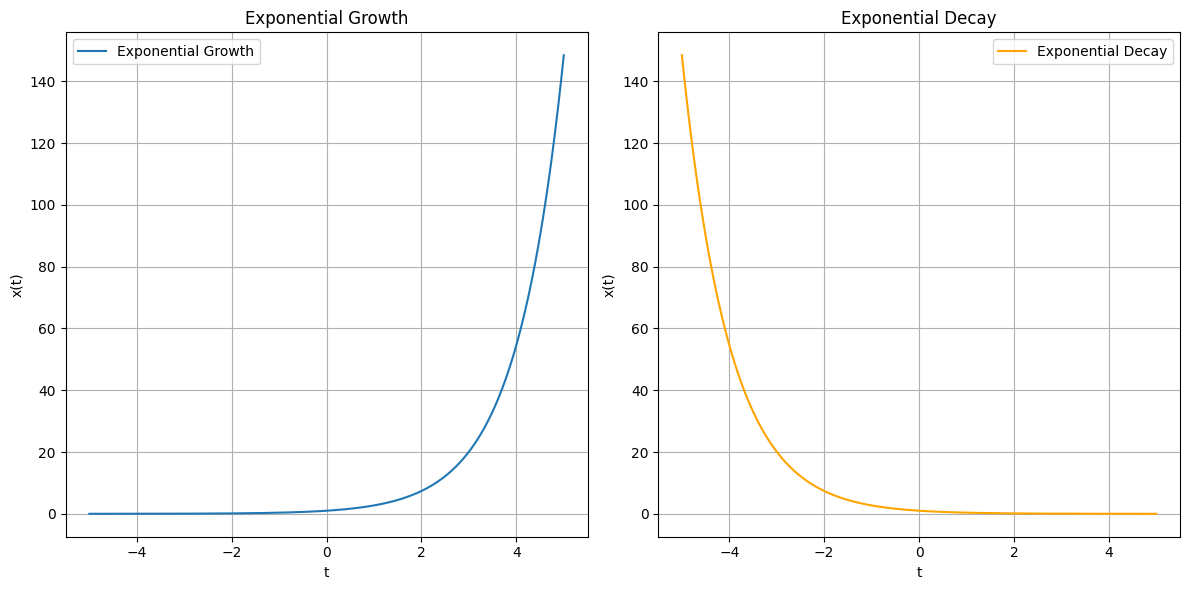

In [ ]:
# @title d)exponential signal decay and growth
#generate exponenential signal original and decay state
def exponential_signal(t, a, decay=False):
    if decay:
        return np.exp(-a * t)
    else:
        return np.exp(a * t)

# Time array
t = np.linspace(-5, 5, 1000)

# Parameters
a = 1  # You can adjust this parameter to see different rates of growth/decay

# Generate signals
growth_signal = exponential_signal(t, a, decay=False)
decay_signal = exponential_signal(t, a, decay=True)

# Plot the exponential growth and decay signals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, growth_signal, label='Exponential Growth')
plt.title('Exponential Growth')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, decay_signal, label='Exponential Decay', color='orange')
plt.title('Exponential Decay')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()





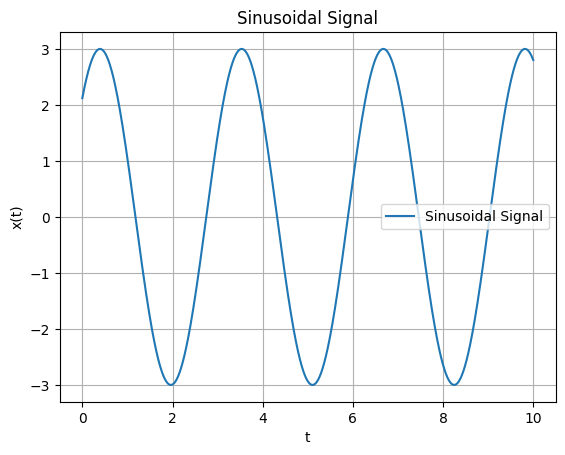

In [ ]:
# @title e) sinsoidal signal
def sinusoidal_signal(t):
    return 3 * np.sin(2 *t + np.pi/4)

t=np.linspace(0, 10, 1000)

signal=sinusoidal_signal(t)

plt.plot(t, signal, label="Sinusoidal Signal")
plt.title("Sinusoidal Signal")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()

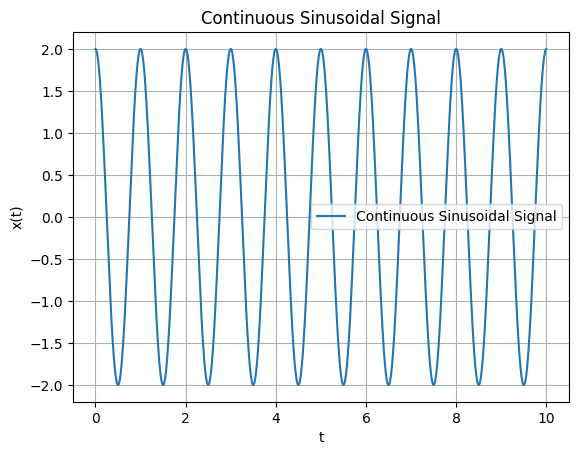

In [ ]:
# @title visualize the effects of sampling and reconstructing a continuous-time signal. a) contuinuous sinusoidal signal

def continuous_sinusoidal_signal(A,t,f,phi):
    return A*np.sin(2*np.pi*f*t+phi)

t=np.linspace (0, 10, 1000)

A=2
f=1
phi=2*np.pi/4

signal=continuous_sinusoidal_signal(A,t,f,phi)

plt.plot(t, signal, label="Continuous Sinusoidal Signal")
plt.title("Continuous Sinusoidal Signal")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
#Sampling the signals at  Nyquist rate
import math
def nyquist(f_max):
  return 2*f_max, 1/(2*f_max)

t=np.linspace(0, 10, 1000)

x=1+np.sin(500*math.pi*t)+np.cos(1000*math.pi*t)
y=1+np.sin(600*math.pi*t)+np.cos(1000*math.pi*t)


nyquist_rate,nyquist_interval = nyquist(f_max)


print("Nyquist Rate:", nyquist_rate)
print("Nyquist Interval:", nyquist_interval)



Nyquist Rate: 2000
Nyquist Interval: 0.0005


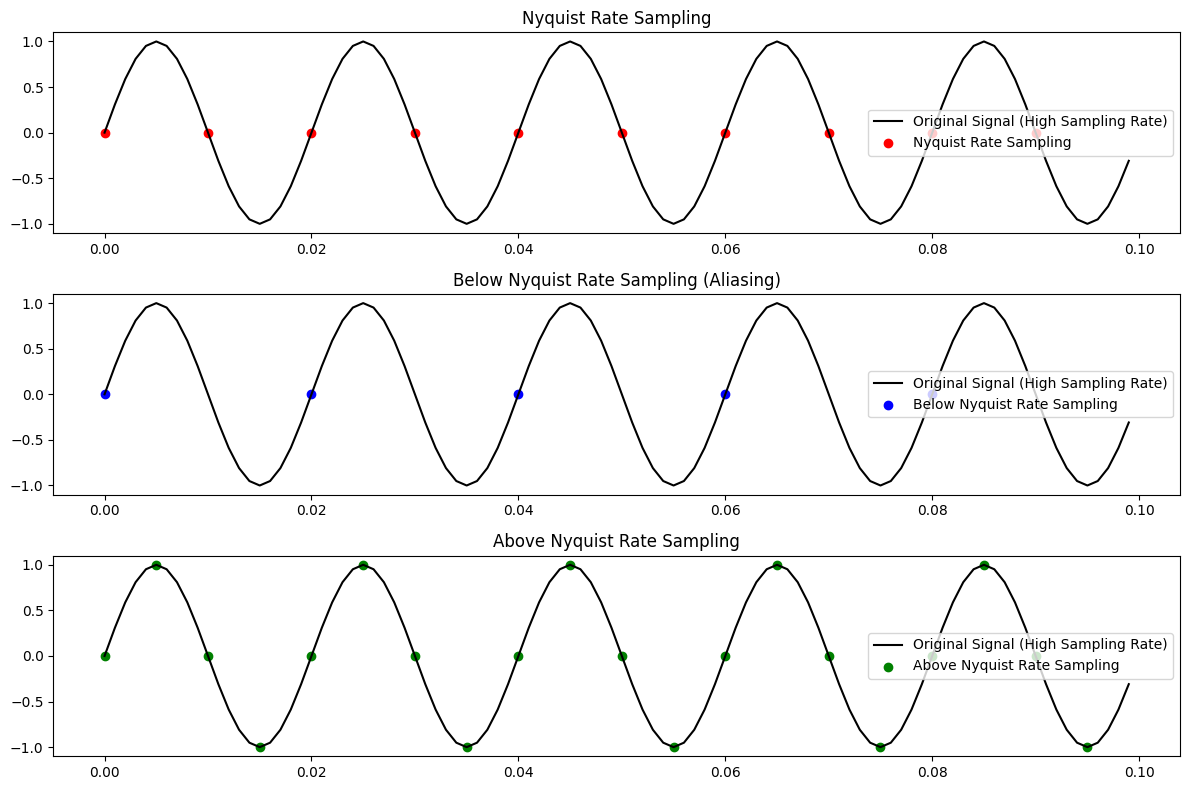

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the signal
def generate_signal(frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1 / sampling_rate)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

# Parameters
f_max = 50  # maximum frequency component in Hz (for Nyquist calculation)
duration = 0.1  # signal duration in seconds

# Nyquist rate, below Nyquist rate, and above Nyquist rate
nyquist_rate = 2 * f_max
below_nyquist_rate = f_max  # Sampling below Nyquist rate
above_nyquist_rate = 4 * f_max  # Sampling above Nyquist rate

# Generate signals at different sampling rates
t_nyquist, signal_nyquist = generate_signal(f_max, duration, nyquist_rate)
t_below, signal_below = generate_signal(f_max, duration, below_nyquist_rate)
t_above, signal_above = generate_signal(f_max, duration, above_nyquist_rate)

# Original signal for reference (sampled at a high rate)
t_original, signal_original = generate_signal(f_max, duration, 10 * nyquist_rate)

# Plotting
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t_original, signal_original, label='Original Signal (High Sampling Rate)', color='black')
plt.scatter(t_nyquist, signal_nyquist, color='red', label='Nyquist Rate Sampling')
plt.title('Nyquist Rate Sampling')
plt.legend()

# Below Nyquist rate
plt.subplot(3, 1, 2)
plt.plot(t_original, signal_original, label='Original Signal (High Sampling Rate)', color='black')
plt.scatter(t_below, signal_below, color='blue', label='Below Nyquist Rate Sampling')
plt.title('Below Nyquist Rate Sampling (Aliasing)')
plt.legend()

# Above Nyquist rate
plt.subplot(3, 1, 3)
plt.plot(t_original, signal_original, label='Original Signal (High Sampling Rate)', color='black')
plt.scatter(t_above, signal_above, color='green', label='Above Nyquist Rate Sampling')
plt.title('Above Nyquist Rate Sampling')
plt.legend()

# Display plot
plt.tight_layout()
plt.show()


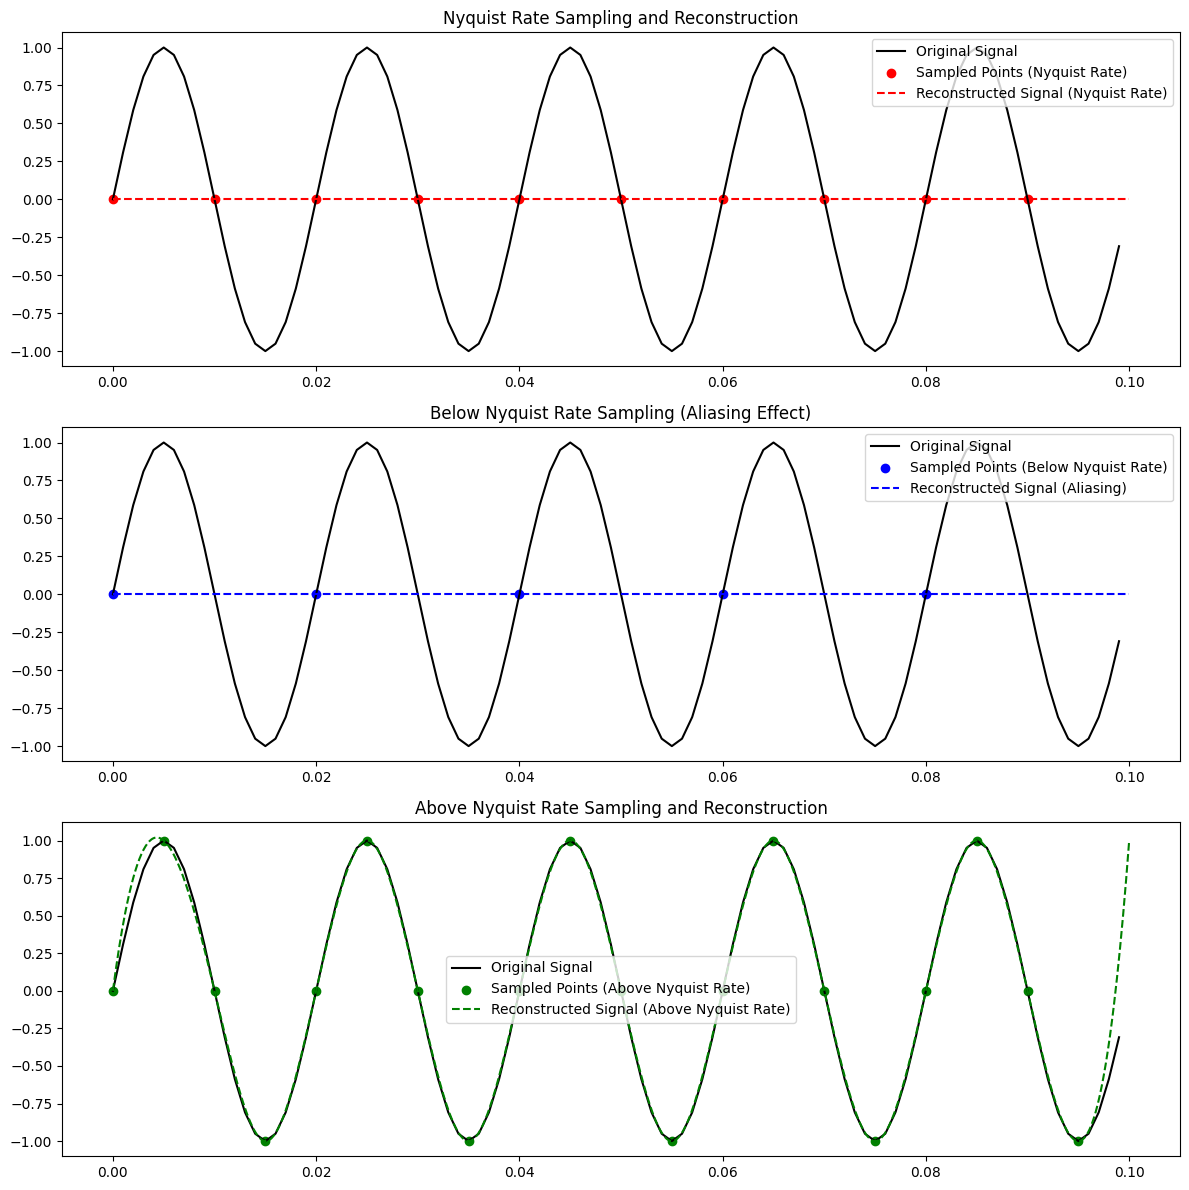

In [ ]:
from scipy.interpolate import interp1d

# Function to generate the signal
def generate_signal(frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1 / sampling_rate)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

# Parameters
f_max = 50  # maximum frequency component in Hz (for Nyquist calculation)
duration = 0.1  # signal duration in seconds

# Nyquist rate, below Nyquist rate, and above Nyquist rate
nyquist_rate = 2 * f_max
below_nyquist_rate = f_max  # Sampling below Nyquist rate
above_nyquist_rate = 4 * f_max  # Sampling above Nyquist rate

# Generate signals at different sampling rates
t_nyquist, signal_nyquist = generate_signal(f_max, duration, nyquist_rate)
t_below, signal_below = generate_signal(f_max, duration, below_nyquist_rate)
t_above, signal_above = generate_signal(f_max, duration, above_nyquist_rate)

# Original signal for reference (sampled at a high rate)
t_original, signal_original = generate_signal(f_max, duration, 10 * nyquist_rate)

# Reconstruct signals using interpolation
reconstructed_nyquist = interp1d(t_nyquist, signal_nyquist, kind='cubic', fill_value="extrapolate")
reconstructed_below = interp1d(t_below, signal_below, kind='cubic', fill_value="extrapolate")
reconstructed_above = interp1d(t_above, signal_above, kind='cubic', fill_value="extrapolate")

# Generate time points for reconstructed signals
t_reconstruct = np.linspace(0, duration, 1000)

# Plotting
plt.figure(figsize=(12, 12))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t_original, signal_original, label='Original Signal', color='black')
plt.scatter(t_nyquist, signal_nyquist, color='red', label='Sampled Points (Nyquist Rate)')
plt.plot(t_reconstruct, reconstructed_nyquist(t_reconstruct), '--r', label='Reconstructed Signal (Nyquist Rate)')
plt.title('Nyquist Rate Sampling and Reconstruction')
plt.legend()

# Below Nyquist rate
plt.subplot(3, 1, 2)
plt.plot(t_original, signal_original, label='Original Signal', color='black')
plt.scatter(t_below, signal_below, color='blue', label='Sampled Points (Below Nyquist Rate)')
plt.plot(t_reconstruct, reconstructed_below(t_reconstruct), '--b', label='Reconstructed Signal (Aliasing)')
plt.title('Below Nyquist Rate Sampling (Aliasing Effect)')
plt.legend()

# Above Nyquist rate
plt.subplot(3, 1, 3)
plt.plot(t_original, signal_original, label='Original Signal', color='black')
plt.scatter(t_above, signal_above, color='green', label='Sampled Points (Above Nyquist Rate)')
plt.plot(t_reconstruct, reconstructed_above(t_reconstruct), '--g', label='Reconstructed Signal (Above Nyquist Rate)')
plt.title('Above Nyquist Rate Sampling and Reconstruction')
plt.legend()

# Display plot
plt.tight_layout()
plt.show()